# Amir Hossein Kargaran Khoozani -- 99201119
# Hamed Jamshidian -- 97212607

- we use owlready2 to make our ontology, also we show graph representation of the ontology as  below:
- there is 5 class, that 3 of them are subclass of Teritory.
- number of each class instances is showed in the class node.
- properties are showed on the edges from domain to range.
- other details are mentioned in markdown of each section in additon of protégé visualization.

showed by http://www.visualdataweb.de/webvowl


# Import Libraries

In [1]:
import csv
import pandas as pd
from owlready2 import *
import numpy as np
from unidecode import unidecode
import math

* Owlready2 * Warning: optimized Cython parser module 'owlready2_optimized' is not available, defaulting to slower Python implementation


# Import Data

In [2]:
countries_df_final = pd.read_csv('./data/countries_df_final.csv', index_col='Index', encoding="utf-16")    
regions_df_final = pd.read_csv('./data/regions_df_final.csv', index_col='Index')    
continents_df_final = pd.read_csv('./data/continents_df_final.csv', index_col='Index')

# PreProcess
- edit prospect value in america continent
- make cpaital city,  UTc time offset unicode
- delete extra spaces in Codes

In [3]:
def edit_prospect_value(text):    
    
    if text.replace(",", "").isnumeric():
        return int(text.replace(",", ""))
    else:
        return sum( map(int, text.replace(",", "").replace("(N)", "").replace("(S)", "").split('/')))


continents_df_final['Population prospect by 2050'] = continents_df_final['Population prospect by 2050'].apply(lambda x: edit_prospect_value(x))
countries_df_final['Capital city'] = countries_df_final['Capital city'].apply(lambda x: unidecode(str(x)))
countries_df_final['UTC time offset'] = countries_df_final['UTC time offset'].apply(lambda x: unidecode(str(x)))
countries_df_final['Code'] = countries_df_final['Code'].apply(lambda x: str(x).replace("1 ", "1"))

# Define Namespces
cuz country, region, continent, and language classes might have same instance name 

In [4]:
geo_ontology = get_ontology("http://ce.sharif.edu/onto")

ns_country = get_ontology("http://ce.sharif.edu/onto/country")
ns_region = get_ontology("http://ce.sharif.edu/onto/region")
ns_continent = get_ontology("http://ce.sharif.edu/onto/continent")
ns_lang = get_ontology("http://ce.sharif.edu/onto/language")

# Define Classes
country, region, continent are subclass of Territory, all of them are dry lands.
also it's useful if we asuume that language is a class

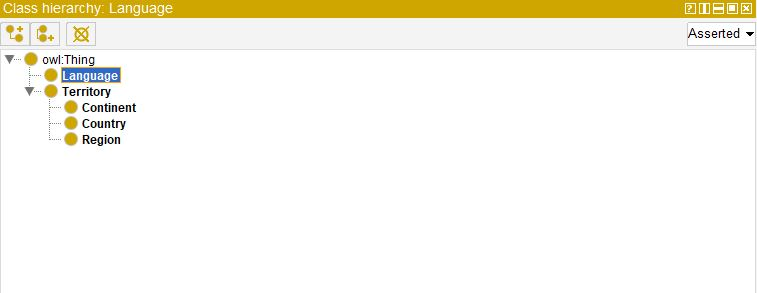

In [5]:
with geo_ontology:
    class Territory(Thing): 
        pass
    class Country(Territory): 
        namespace = ns_country
        
    class Region(Territory): 
        namespace = ns_region

    class Continent(Territory): 
        namespace = ns_continent
        
    class Language(Thing):
        namespace = ns_lang
        
    AllDisjoint([Continent, Country, Region, Language])

# Object Properties
- relation between classes: country <-> country (neighbourhood), country <-> region, region <-> continent, country <-> language
- also as we seen in https://data.un.org/en/regions.html there is a sub-region relation between regions in Africa and America too. so we have region <-> region
- as there is a unique value for some of the properties they assume as functionalproperty: e.g, each region located in one continent, each sub region is located in one super region, each country is located in one region

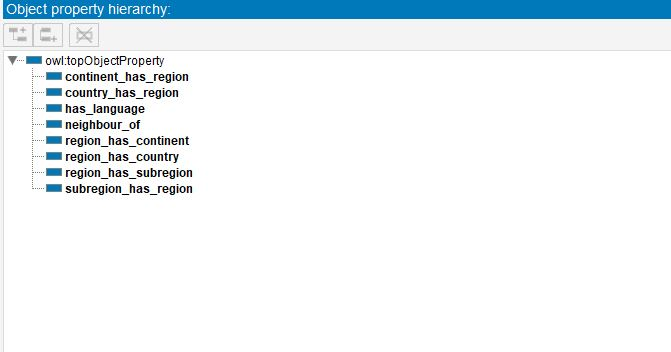

In [6]:
with geo_ontology:
    
    #Country
    class neighbour_of(Country >> Country): 
        pass
    
    class country_has_region(Country >> Region, FunctionalProperty): 
        pass
    
    class has_language(Country >> Language): 
        pass

    #Region
    class region_has_country(Region >> Country): 
        inverse_property = country_has_region
        
    class region_has_subregion(Region >> Region):
        pass

    class subregion_has_region(Region >> Region, FunctionalProperty):
        inverse_property = region_has_subregion
    
    class region_has_continent(Region >> Continent, FunctionalProperty): 
        pass
    
    
    #Continent
    class continent_has_region(Continent >> Region): 
        inverse_property = region_has_continent


# Data Type Properties
- continents, regions and countries have some same properties such as name, poulation, area 
- continent have pupulation prospect proprety
- country have some properties in general and related to economic, social environment and infrastructure
- each property goes from its domain (classes) to a str, float or int
- as there is a unique value for each of the properties, all of them are functional

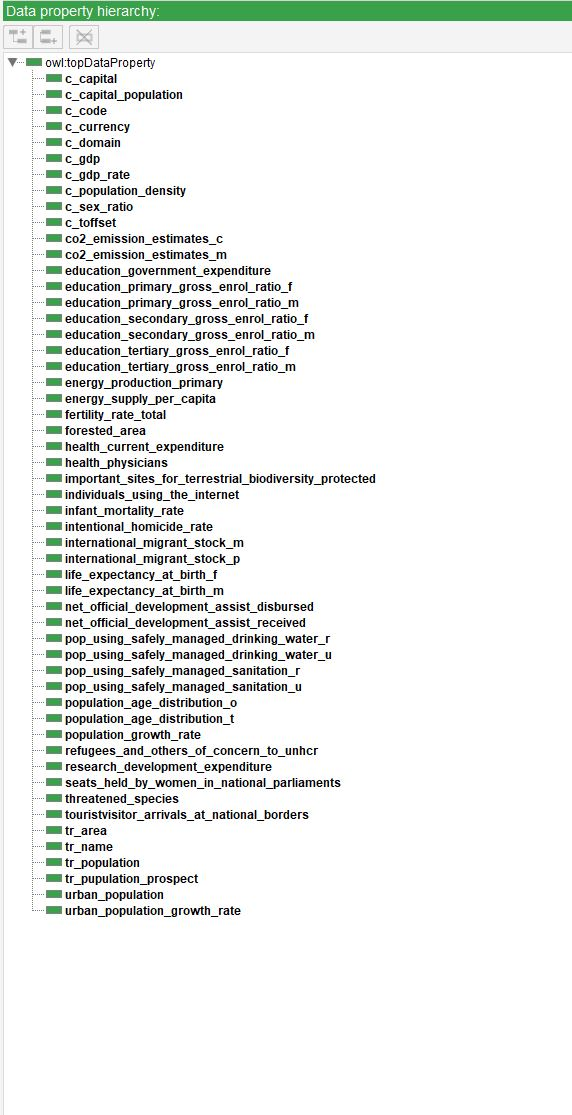

In [7]:
# Auto generating names for data properties class 
# a = "Population growth rate(average annual %)	Urban population(% of total population)	Urban population growth rate(average annual %)	Fertility rate, total(live births per woman)	Life expectancy at birth(females/males, years)	Population age distribution(0-14/60+ years old, %)	International migrant stock(000/% of total pop.)	Refugees and others of concern to UNHCR(000)	Infant mortality rate(per 1 000 live births)	Health: Current expenditure(% of GDP)	Health: Physicians(per 1 000 pop.)	Education: Government expenditure(% of GDP)	Education: Primary gross enrol. ratio(f/m per 100 pop.)	Education: Secondary gross enrol. ratio(f/m per 100 pop.)	Education: Tertiary gross enrol. ratio(f/m per 100 pop.)	Intentional homicide rate(per 100 000 pop.)	Seats held by women in national parliaments(%)	Individuals using the Internet(per 100 inhabitants)	Threatened species(number)	Forested area(% of land area)	Energy production, primary(Petajoules)	Energy supply per capita(Gigajoules)	Important sites for terrestrial biodiversity protected(%)	Net Official Development Assist. received(% of GNI)	Research & Development expenditure(% of GDP)	CO2 emission estimates(million tons/tons per capita)	Tourist/visitor arrivals at national borders(000)	Pop. using safely managed sanitation(urban/rural %)	Pop. using safely managed drinking water(urban/rural, %)	Net Official Development Assist. disbursed(% of GNI)"
# for i in a.split(")"):
#     k= i.split('(')[0].replace(".", "").replace(" ", "_"). replace(":","").replace("/", "").replace("&", "_").replace("," ,"").lower()
#     print("class" + k + "(Country >> float , FunctionalProperty): pass")

In [8]:
with geo_ontology:
    
    #Teritory
    class tr_name(Territory >> str, FunctionalProperty): pass
    class tr_population(Territory >> int, FunctionalProperty): pass
    class tr_area(Territory >> int, FunctionalProperty): pass
    class tr_pupulation_prospect(Continent >> int, FunctionalProperty): pass
    
    
    #Country
    class c_code(Country >> int): pass
    class c_capital(Country >> str, FunctionalProperty): pass
    class c_currency(Country >> str, FunctionalProperty): pass
    class c_toffset(Country >> str): pass
    class c_domain(Country >> str, FunctionalProperty): pass
    class c_population_density(Country >> float, FunctionalProperty): pass
    class c_capital_population(Country >> float, FunctionalProperty): pass
    class c_sex_ratio(Country >> float, FunctionalProperty): pass
    class c_gdp(Country >> int,FunctionalProperty): pass
    class c_gdp_rate(Country >> float , FunctionalProperty): pass
    
    #Auto_Gen
    class population_growth_rate(Country >> float , FunctionalProperty): pass
    class urban_population(Country >> float , FunctionalProperty): pass
    class urban_population_growth_rate(Country >> float , FunctionalProperty): pass
    class fertility_rate_total(Country >> float , FunctionalProperty): pass
    
    class life_expectancy_at_birth_f(Country >> float , FunctionalProperty): pass
    class life_expectancy_at_birth_m(Country >> float , FunctionalProperty): pass
    
    class population_age_distribution_t(Country >> float , FunctionalProperty): pass
    class population_age_distribution_o(Country >> float , FunctionalProperty): pass
    
    class international_migrant_stock_m(Country >> float , FunctionalProperty): pass
    class international_migrant_stock_p(Country >> float , FunctionalProperty): pass
    
    class refugees_and_others_of_concern_to_unhcr(Country >> float , FunctionalProperty): pass
    class infant_mortality_rate(Country >> float , FunctionalProperty): pass
    class health_current_expenditure(Country >> float , FunctionalProperty): pass
    class health_physicians(Country >> float , FunctionalProperty): pass
    class education_government_expenditure(Country >> float , FunctionalProperty): pass
    
    class education_primary_gross_enrol_ratio_f(Country >> float , FunctionalProperty): pass
    class education_primary_gross_enrol_ratio_m(Country >> float , FunctionalProperty): pass
    
    class education_secondary_gross_enrol_ratio_f(Country >> float , FunctionalProperty): pass
    class education_secondary_gross_enrol_ratio_m(Country >> float , FunctionalProperty): pass
    
    class education_tertiary_gross_enrol_ratio_f(Country >> float , FunctionalProperty): pass
    class education_tertiary_gross_enrol_ratio_m(Country >> float , FunctionalProperty): pass
    
    class intentional_homicide_rate(Country >> float , FunctionalProperty): pass
    class seats_held_by_women_in_national_parliaments(Country >> float , FunctionalProperty): pass
    class individuals_using_the_internet(Country >> float , FunctionalProperty): pass
    
    class threatened_species(Country >> int , FunctionalProperty): pass
    
    class forested_area(Country >> float , FunctionalProperty): pass
    
    class energy_production_primary(Country >> int , FunctionalProperty): pass
    class energy_supply_per_capita(Country >> int , FunctionalProperty): pass
    
    class important_sites_for_terrestrial_biodiversity_protected(Country >> float , FunctionalProperty): pass
    class net_official_development_assist_received(Country >> float , FunctionalProperty): pass
    class research_development_expenditure(Country >> float , FunctionalProperty): pass
    
    class co2_emission_estimates_m(Country >> float , FunctionalProperty): pass
    class co2_emission_estimates_c(Country >> float , FunctionalProperty): pass

    class touristvisitor_arrivals_at_national_borders(Country >> int , FunctionalProperty): pass
    
    class pop_using_safely_managed_sanitation_u(Country >> float , FunctionalProperty): pass
    class pop_using_safely_managed_sanitation_r(Country >> float , FunctionalProperty): pass

    class pop_using_safely_managed_drinking_water_u(Country >> float , FunctionalProperty): pass
    class pop_using_safely_managed_drinking_water_r(Country >> float , FunctionalProperty): pass

    
    class net_official_development_assist_disbursed(Country >> float , FunctionalProperty): pass

# Insert Data

## Functions for normalizing names 

In [9]:
def convertURI(text):
    return unidecode(text).replace("&", "and").replace(" ", "_").replace("-", "_").replace('"', "")

def normalize(text):
    return unidecode(text).replace("&", "and")

## Insert data to Continent Class
- we add name, area, ... also we add regions with append method in owlready2, cuz it's not functional.

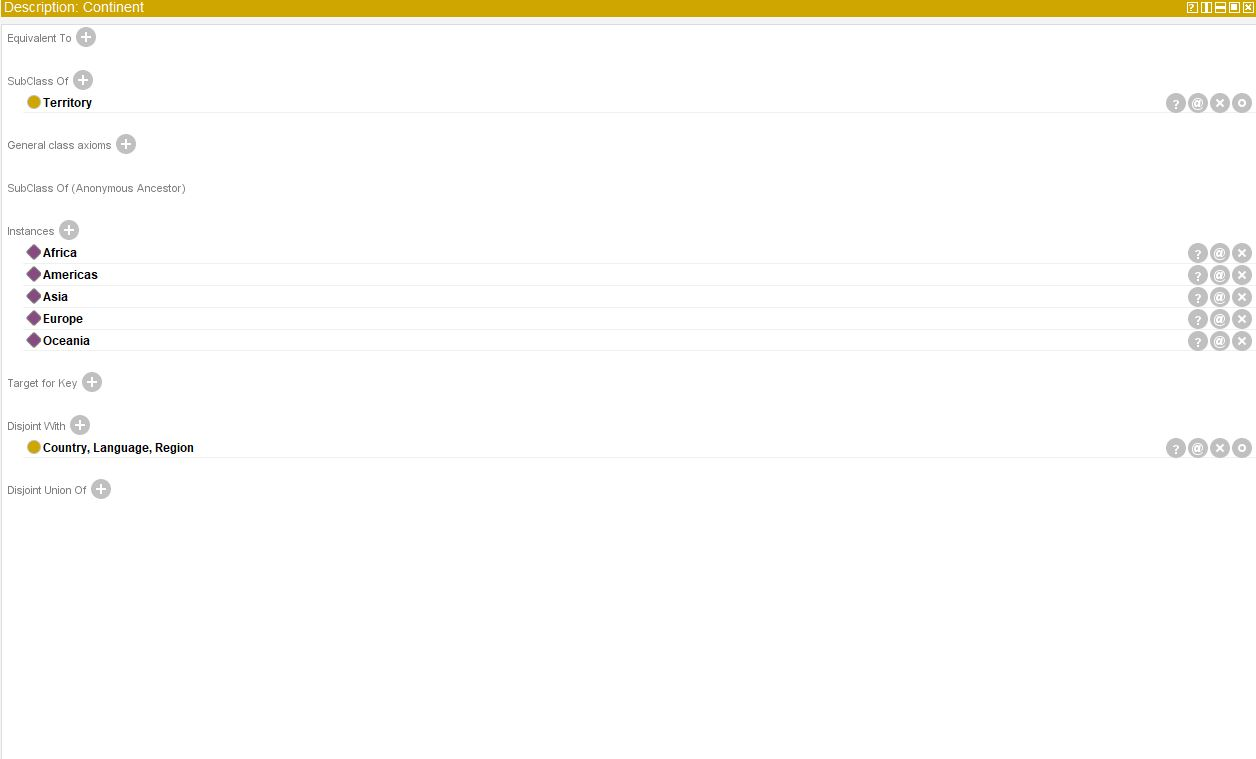

In [10]:
with geo_ontology:
    for index, row in continents_df_final.iterrows():
        the_continent = Continent(convertURI(row['Index.1']), ns_continent, tr_name=normalize(row['Index.1'])) 
        if row['Surface area(km2)']: the_continent.tr_area = int(row['Surface area(km2)'])
        if row['Population(000, 2020)']: the_continent.tr_population = int(row['Population(000, 2020)'])
        if row['Population prospect by 2050']: the_continent.tr_pupulation_prospect = int(row['Population prospect by 2050'])

        if row['Regions']:
            for i in row['Regions'].replace("[","").replace("]", "").replace("'","").split(", "):
                the_region = Region(convertURI(i), ns_region) 
                the_continent.continent_has_region.append(the_region)

## Insert data to Region Class
- we add name, area, ... also we add countries with append method in owlready2, cuz it's not functional.
- we add region <-> region relation, for the 'Sub-Saharan Africa', 'Latin America & Caribbean' regions as super regions.

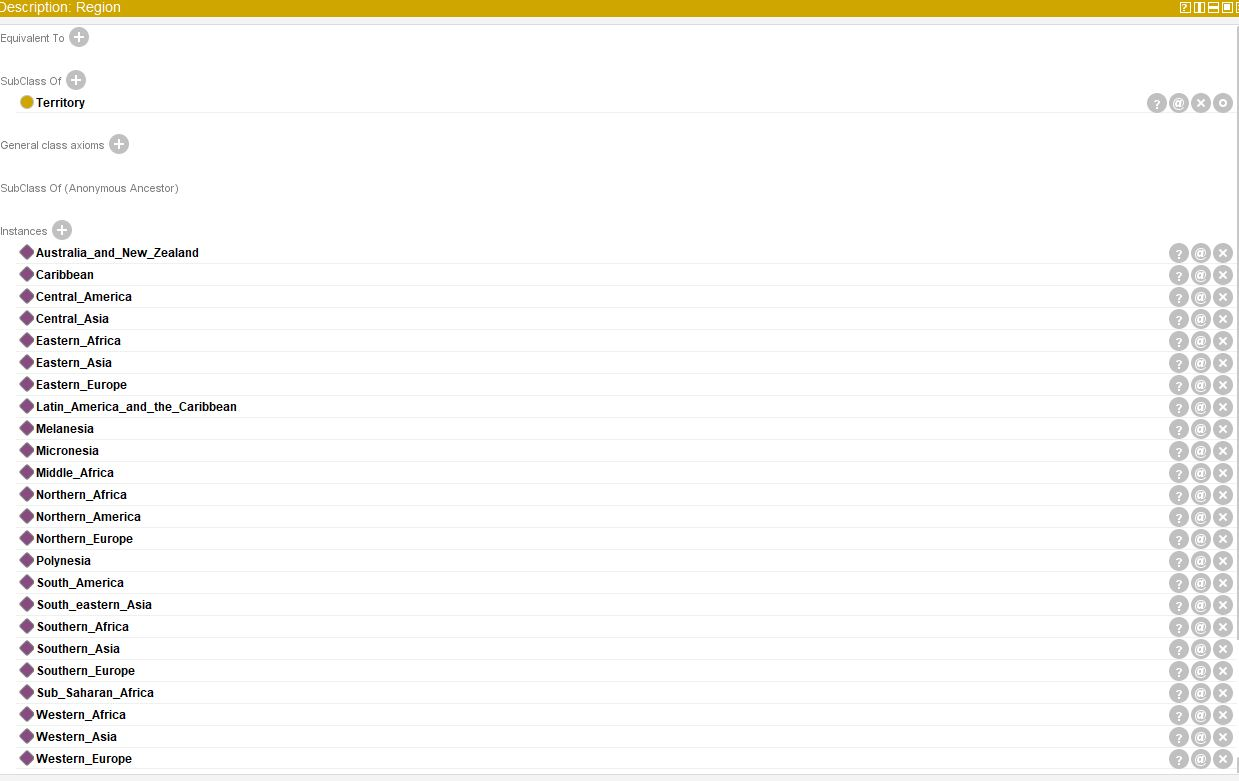

In [11]:
with geo_ontology:
    for index, row in regions_df_final.iterrows():
        the_region = Region(convertURI(row['Index.1']), ns_region, tr_name=normalize(row['Index.1'])) 
        if row['Surface area(km2)']: the_region.tr_area = int(row['Surface area(km2)'])
        if row['Population(000, 2020)']: the_region.tr_population = int(row['Population(000, 2020)'])
            
        if row['Region'] in ['Sub-Saharan Africa', 'Latin America & Caribbean']:
            i = row['Region'] if row['Region']== 'Sub-Saharan Africa' else 'Latin America and the Caribbean'
            the_super_region = Region(convertURI(i), ns_region) 
            the_region.subregion_has_region = the_super_region
            
        if str(row['Countries'])!='nan':
            for i in str(row['Countries']).replace("[","").replace("]", "").replace("'","").split(", "):
                the_country = Country(convertURI(i), ns_country) 
                the_region.region_has_country.append(the_country)            

## Insert data to Country Class
- we add name, area, ... also we add specific country properties related to economic, social environment and infrastructure.
- there is some corrupted data in some of the UNDATA tables, we handle them with try except.
for example in 'Capital city pop.(000, 2020)' there is some data as date! not number!

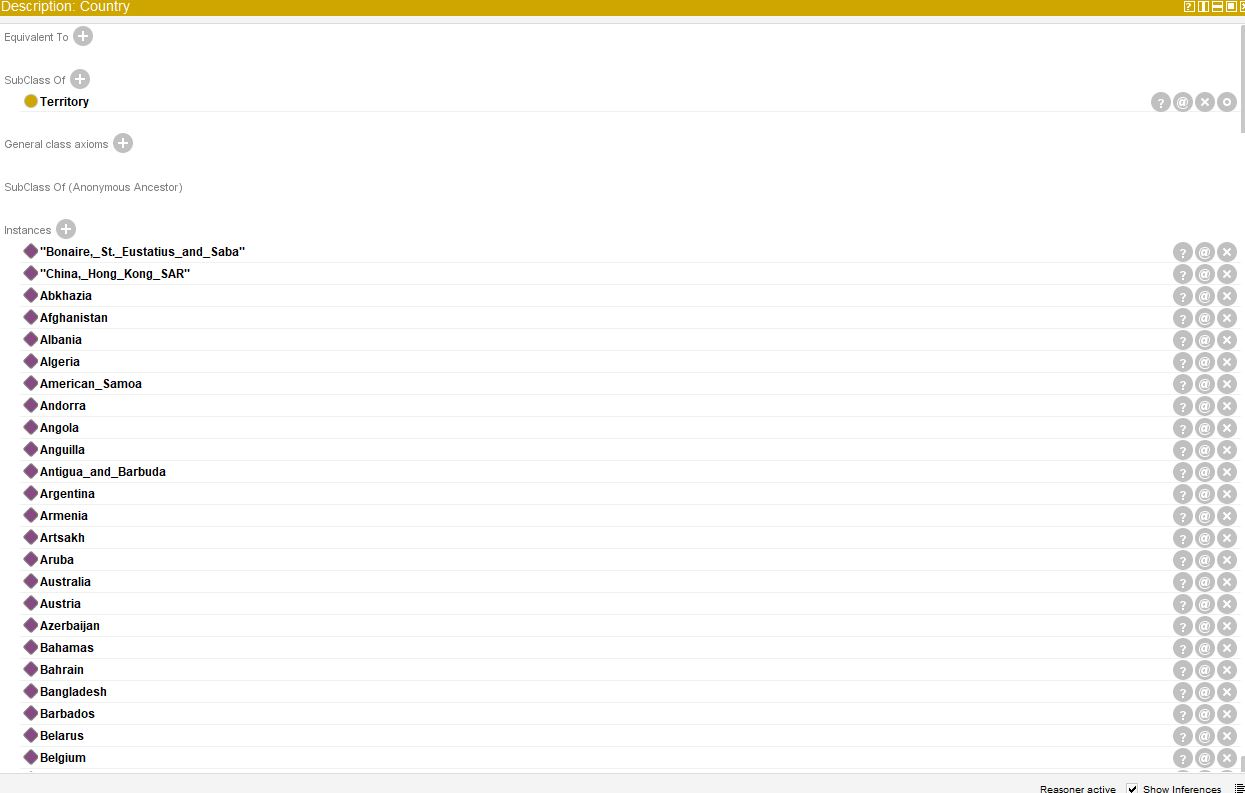

In [12]:
with geo_ontology:
    for index, row in countries_df_final.iterrows():
        the_country = Country(convertURI(row['Index.1']), ns_country, tr_name=normalize(row['Index.1']))
        
        if str(row['Surface area(km2)'])!='nan':
            try:
                the_country.tr_area = int(row['Surface area(km2)'])
            except:
                pass #~0
            
        if str(row['Population(000, 2020)'])!='nan':
            try:
                the_country.tr_population = int(row['Population(000, 2020)'])
            except:
                pass #nothing
                
        if row['Code']!='nan':
            for i in str(row['Code']).split(" "):
                the_country.c_code.append(int(i))

        if row['Capital city']!='nan':
            the_country.c_capital =  normalize(row['Capital city'])
            
        if str(row['Currency+ISO-4217'])!='nan':
            the_country.c_currency = str(row['Currency+ISO-4217'])

        if row['UTC time offset']!='nan':
            for i in row['UTC time offset'].replace("[","").replace("]", "").replace("'","").split(", "):
                the_country.c_toffset.append(str(i))
        
        if str(row['Internet Domain'])!='nan':
            the_country.c_domain = str(row['Internet Domain']).replace(".", "")
            
        if str(row['Pop. density(per km2, 2020)'])!='nan':
            the_country.c_population_density = float(row['Pop. density(per km2, 2020)'])
            
        if str(row['Capital city pop.(000, 2020)'])!='nan':
            try:
                the_country.c_capital_population = float(row['Capital city pop.(000, 2020)'])
            except:
                pass #date!
            
        if str(row['Sex ratio(m per 100 f)'])!='nan':
            the_country.c_sex_ratio = float(row['Sex ratio(m per 100 f)'])
        
        if str(row['GDP: Gross domestic product(million current US$)'])!='nan':
            the_country.c_gdp = int(row['GDP: Gross domestic product(million current US$)'])
 
        if str(row['GDP growth rate(annual %, const. 2015 prices)'])!='nan':
            try:
                the_country.c_gdp_rate = float(row['GDP growth rate(annual %, const. 2015 prices)'])
            except:
                pass #~0.0
        
        if str(row['Language'])!='nan':
            for i in str(row['Language']).replace("[","").replace("]", "").replace("'","").split(", "):
                if i not in ['No offical language in India', '', '37 other languages']:
                    if row['Index.1'] =='India':
                        print(i)
                    the_lang = Language(convertURI(i), ns_lang) 
                    the_country.has_language.append(the_lang)
                                        
        if str(row['Neighbors'])!='nan' and str(row['Neighbors'])!='[]':
            for i in str(row['Neighbors']).replace("[","").replace("]", "").replace("'","").split(", "):
                the_neighbor = Country(convertURI(i), ns_country) 
                the_country.neighbour_of.append(the_neighbor)
        
        if str(row['Population growth rate(average annual %)'])!='nan':
            try:
                the_country.population_growth_rate = float(row['Population growth rate(average annual %)'])
            except:
                pass #~0.0, -~0.0
            
        if str(row['Urban population(% of total population)'])!='nan':
            try:
                the_country.urban_population = float(row['Urban population(% of total population)'])
            except:
                pass

        if str(row['Urban population growth rate(average annual %)'])!='nan':
            try:
                the_country.urban_population_growth_rate= float(row['Urban population growth rate(average annual %)'])
            except:
                pass
        if str(row['Fertility rate, total(live births per woman)'])!='nan':
            try:
                the_country.fertility_rate_total = float(row['Fertility rate, total(live births per woman)'])
            except:
                pass

        if str(row['Life expectancy at birth(females/males, years)'])!='nan':
            i = str(row['Life expectancy at birth(females/males, years)']).split('/')
            try:
                the_country.life_expectancy_at_birth_f = float(i[0])
            except:
                pass
            try:
                 the_country.life_expectancy_at_birth_m = float(i[1])
            except:
                pass

        if str(row['Population age distribution(0-14/60+ years old, %)'])!='nan':
            i = str(row['Population age distribution(0-14/60+ years old, %)']).split('/')
            try:
                the_country.population_age_distribution_t = float(i[0])
            except:
                pass
            try:
                 the_country.population_age_distribution_o = float(i[1])
            except:
                pass

        if str(row['International migrant stock(000/% of total pop.)'])!='nan':
            i = str(row['International migrant stock(000/% of total pop.)']).split('/')
            try:
                the_country.international_migrant_stock_m = float(i[0])
            except:
                pass
            try:
                 the_country.international_migrant_stock_p = float(i[1])
            except:
                pass

        if str(row['Refugees and others of concern to UNHCR(000)'])!='nan':
            try:
                the_country.refugees_and_others_of_concern_to_unhcr = float(row['Refugees and others of concern to UNHCR(000)'])
            except:
                pass

        if str(row['Infant mortality rate(per 1 000 live births)'])!='nan':
            try:
                the_country.infant_mortality_rate = float(row['Infant mortality rate(per 1 000 live births)'])
            except:
                pass

        if str(row['Health: Current expenditure(% of GDP)'])!='nan':
            try:
                the_country.health_current_expenditure = float(row['Health: Current expenditure(% of GDP)'])
            except:
                pass

        if str(row['Health: Physicians(per 1 000 pop.)'])!='nan':
            try:
                the_country.health_physicians = float(row['Health: Physicians(per 1 000 pop.)'])
            except:
                pass

        if str(row['Education: Government expenditure(% of GDP)'])!='nan':
            try:
                the_country.education_government_expenditure = float(row['Education: Government expenditure(% of GDP)'])
            except:
                pass

        if str(row['Education: Primary gross enrol. ratio(f/m per 100 pop.)'])!='nan':
            i = str(row['Education: Primary gross enrol. ratio(f/m per 100 pop.)']).split('/')
            try:
                the_country.education_primary_gross_enrol_ratio_f = float(i[0])
            except:
                pass
            try:
                 the_country.education_primary_gross_enrol_ratio_m = float(i[1])
            except:
                pass

        if str(row['Education: Secondary gross enrol. ratio(f/m per 100 pop.)'])!='nan':
            i = str(row['Education: Secondary gross enrol. ratio(f/m per 100 pop.)']).split('/')
            try:
                the_country.education_secondary_gross_enrol_ratio_f= float(i[0])
            except:
                pass
            try:
                 the_country.education_secondary_gross_enrol_ratio_m = float(i[1])
            except:
                pass

        if str(row['Education: Tertiary gross enrol. ratio(f/m per 100 pop.)'])!='nan':
            i = str(row['Education: Tertiary gross enrol. ratio(f/m per 100 pop.)']).split('/')
            try:
                the_country.education_tertiary_gross_enrol_ratio_f= float(i[0])
            except:
                pass
            try:
                 the_country.education_tertiary_gross_enrol_ratio_m = float(i[1])
            except:
                pass
            
        if str(row['Intentional homicide rate(per 100 000 pop.)'])!='nan':
            try:
                the_country.intentional_homicide_rate = float(row['Intentional homicide rate(per 100 000 pop.)'])
            except:
                pass #~0.0

        if str(row['Seats held by women in national parliaments(%)'])!='nan':
            try:
                the_country.seats_held_by_women_in_national_parliaments = float(row['Seats held by women in national parliaments(%)'])
            except:
                pass #~0.0
                
        if str(row['Individuals using the Internet(per 100 inhabitants)'])!='nan':
            the_country.individuals_using_the_internet = float(row['Individuals using the Internet(per 100 inhabitants)'])
            
        if str(row['Threatened species(number)'])!='nan':
            the_country.threatened_species = int(row['Threatened species(number)'])
            
        if str(row['Forested area(% of land area)'])!='nan':
            try:
                the_country.forested_area = float(row['Forested area(% of land area)'])
            except:
                pass #~0.0
            
        if str(row['Energy production, primary(Petajoules)'])!='nan':
            the_country.energy_production_primary = int(row['Energy production, primary(Petajoules)'])
            
        if(str(row['Energy supply per capita(Gigajoules)']))!='nan':
            the_country.energy_supply_per_capita = int(row['Energy supply per capita(Gigajoules)'])
        
        if(str(row['Important sites for terrestrial biodiversity protected(%)']))!='nan':
            try:
                the_country.important_sites_for_terrestrial_biodiversity_protected = float(row['Important sites for terrestrial biodiversity protected(%)'])
            except:
                pass #~0.0
                
        if(str(row['Net Official Development Assist. received(% of GNI)']))!='nan':
            the_country.net_official_development_assist_received = float(row['Net Official Development Assist. received(% of GNI)'])
            
        if(str(row['Research & Development expenditure(% of GDP)']))!='nan':
            try:
                the_country.research_development_expenditure = float(row['Research & Development expenditure(% of GDP)'])
            except:
                pass #~0.0

        if str(row['CO2 emission estimates(million tons/tons per capita)'])!='nan':
            i = str(row['CO2 emission estimates(million tons/tons per capita)']).split('/')
            try:
                the_country.co2_emission_estimates_m = float(i[0])
            except:
                pass #~0.0
            try:
                the_country.co2_emission_estimates_c = float(i[1])
            except:
                pass #~0.0

        if(str(row['Tourist/visitor arrivals at national borders(000)']))!='nan':
            try:
                the_country.touristvisitor_arrivals_at_national_borders = int(row['Tourist/visitor arrivals at national borders(000)'])
            except:
                pass
            
        if str(row['Pop. using safely managed sanitation(urban/rural %)'])!='nan':
            i = str(row['Pop. using safely managed sanitation(urban/rural %)']).split('/')
            try:
                the_country.pop_using_safely_managed_sanitation_u = float(i[0])
            except:
                pass #...
            try:
                the_country.pop_using_safely_managed_sanitation_r = float(i[1])
            except:
                pass #...
         
        
        if str(row['Pop. using safely managed drinking water(urban/rural, %)'])!='nan':
            i = str(row['Pop. using safely managed drinking water(urban/rural, %)']).split('/')
            try:
                the_country.pop_using_safely_managed_drinking_water_u = float(i[0])
            except:
                pass #...
            try:
                the_country.pop_using_safely_managed_drinking_water_r = float(i[1])
            except:
                pass #...
                        
        if(str(row['Net Official Development Assist. disbursed(% of GNI)']))!='nan':
            the_country.net_official_development_assist_disbursed = float(row['Net Official Development Assist. disbursed(% of GNI)'])


In [13]:
geo_ontology.save(file="./output/ontology_v2.owl")